#Importing Libraries

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

#Dataset

In [195]:
data=pd.read_csv("bigmart.csv")

In [196]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


#Shape of Dataset

In [197]:
print("The data has \n{} rows \nand \n{} columns".format(data.shape[0],data.shape[1]))

The data has 
8523 rows 
and 
12 columns


#Information of Dataset

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [199]:
data.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [200]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#Checking the null values present in Dataset

In [201]:
# Checking how many rows are having all the null values

data.isnull().all(axis = 1).sum()

0

In [202]:
# Checking how many columns are having all the null values

data.isnull().all(axis = 0).sum()

0

In [203]:
# Checking the null values present in all the columns

data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [204]:
# Checking the null values present in all the rows

data.isnull().sum(axis=1)

,0
0,0
1,0
2,0
3,1
4,0
...,...
8518,0
8519,1
8520,0
8521,0


In [205]:
# Length of the Dataset

len(data)

8523

In [206]:
# Checking the percentage of missing values in the columns of the dataset

round((data.isnull().sum() * 100 / len(data) ), 2)

,0
Item_Identifier,0.00
Item_Weight,17.17
Item_Fat_Content,0.00
Item_Visibility,0.00
Item_Type,0.00
Item_MRP,0.00
Outlet_Identifier,0.00
Outlet_Establishment_Year,0.00
Outlet_Size,28.28
Outlet_Location_Type,0.00


In [207]:
percentage_of_missing_values = round((data.isnull().sum()/len(data)*100), 2)
print(percentage_of_missing_values)

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64


In [208]:
# Describing 'Item_Weight' column

data['Item_Weight'].describe()

,Item_Weight
count,7060.000000
mean,12.857645
std,4.643456
min,4.555000
25%,8.773750
50%,12.600000
75%,16.850000
max,21.350000


In [209]:
# Filling the null values with median value

data['Item_Weight'].fillna(data['Item_Weight'].median(), inplace=True)

In [210]:
# Describing 'Outlet_Size' column

data['Outlet_Size'].describe()

,Outlet_Size
count,6113
unique,3
top,Medium
freq,2793


In [211]:
# Checking the values frequency of 'Outlet_Size'

data['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [212]:
# Filling the null values with most frequent value of 'Outlet_Size' column

data['Outlet_Size'].fillna('Medium', inplace=True)

In [213]:
# Checking again the presence of null values in all the columns

data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


#**Dealing with Outliers**

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [215]:
# Dropping indentity columns and year of establishment column

data.drop(['Item_Identifier','Outlet_Identifier', 'Outlet_Establishment_Year'],axis=1,inplace=True)

In [216]:
data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

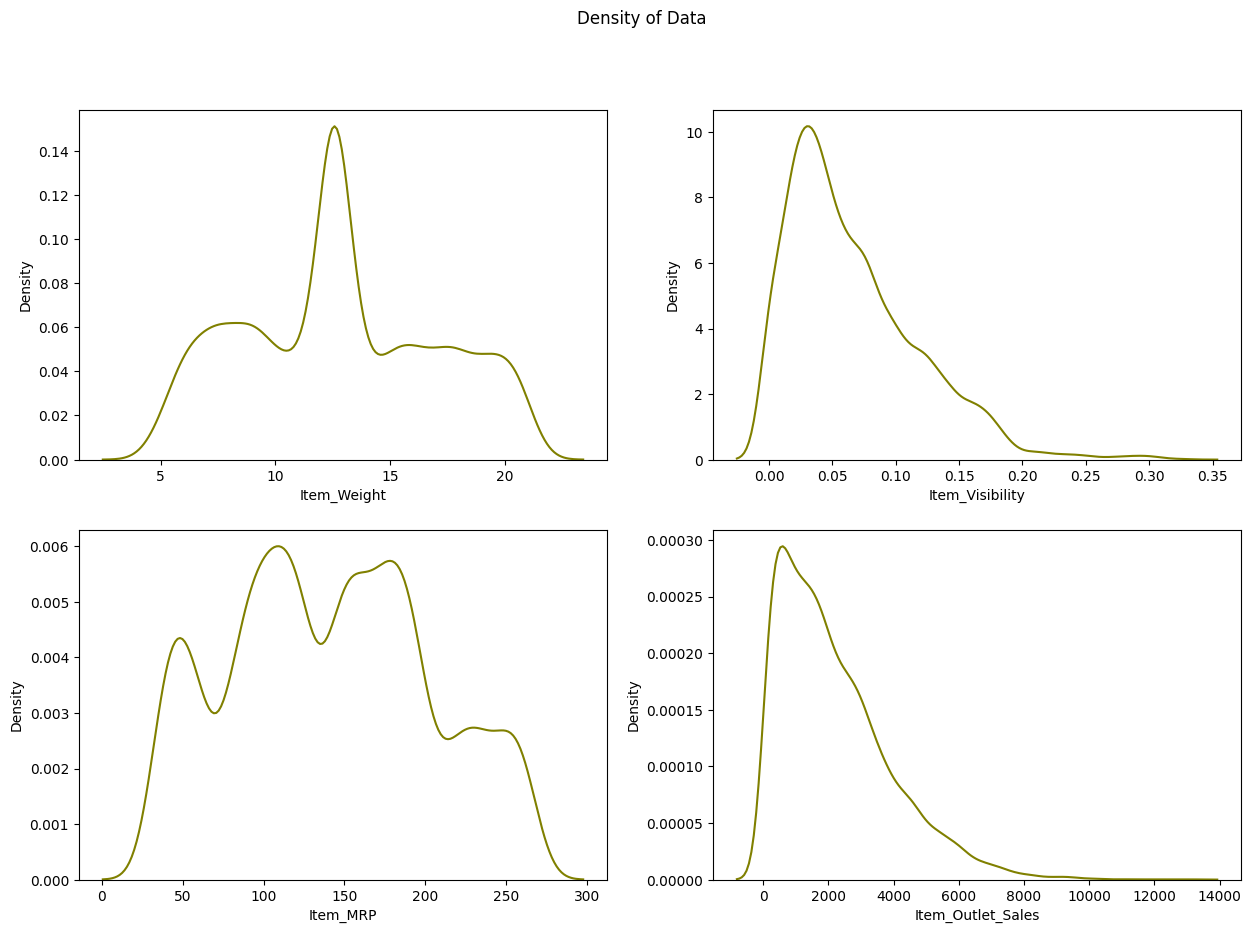

In [217]:
# Data density in the columns

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.kdeplot(data['Item_Weight'], color = 'olive')

plt.subplot(2,2,2)
sns.kdeplot(data['Item_Visibility'], color = 'olive')

plt.subplot(2,2,3)
sns.kdeplot(data['Item_MRP'], color = 'olive')

plt.subplot(2,2,4)
sns.kdeplot(data['Item_Outlet_Sales'], color = 'olive')

plt.suptitle("Density of Data")
plt.show()

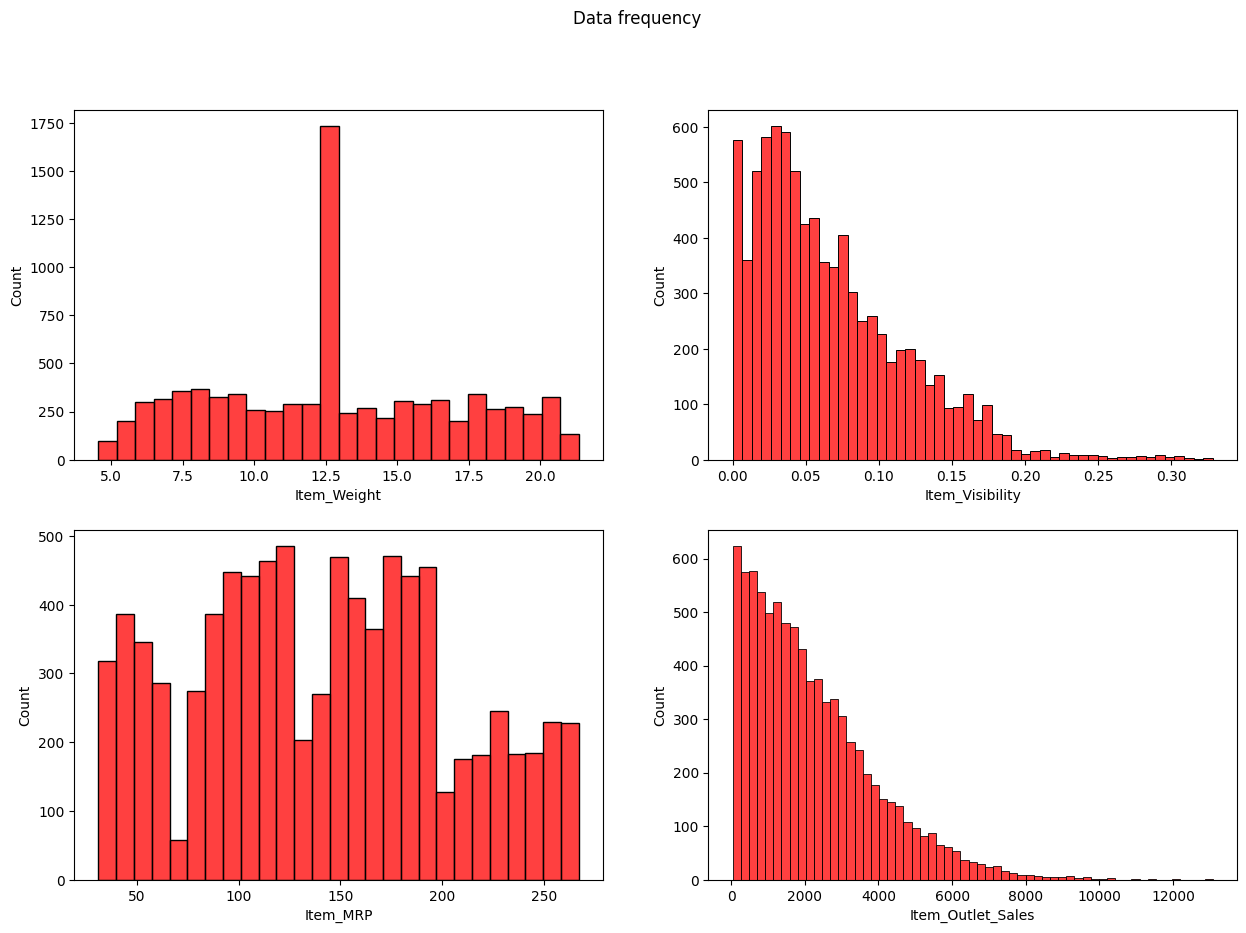

In [218]:
# Frequency of Data

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(data['Item_Weight'], color = 'red')

plt.subplot(2,2,2)
sns.histplot(data['Item_Visibility'], color = 'red')

plt.subplot(2,2,3)
sns.histplot(data['Item_MRP'], color = 'red')

plt.subplot(2,2,4)
sns.histplot(data['Item_Outlet_Sales'], color = 'red')

plt.suptitle("Data frequency")
plt.show()

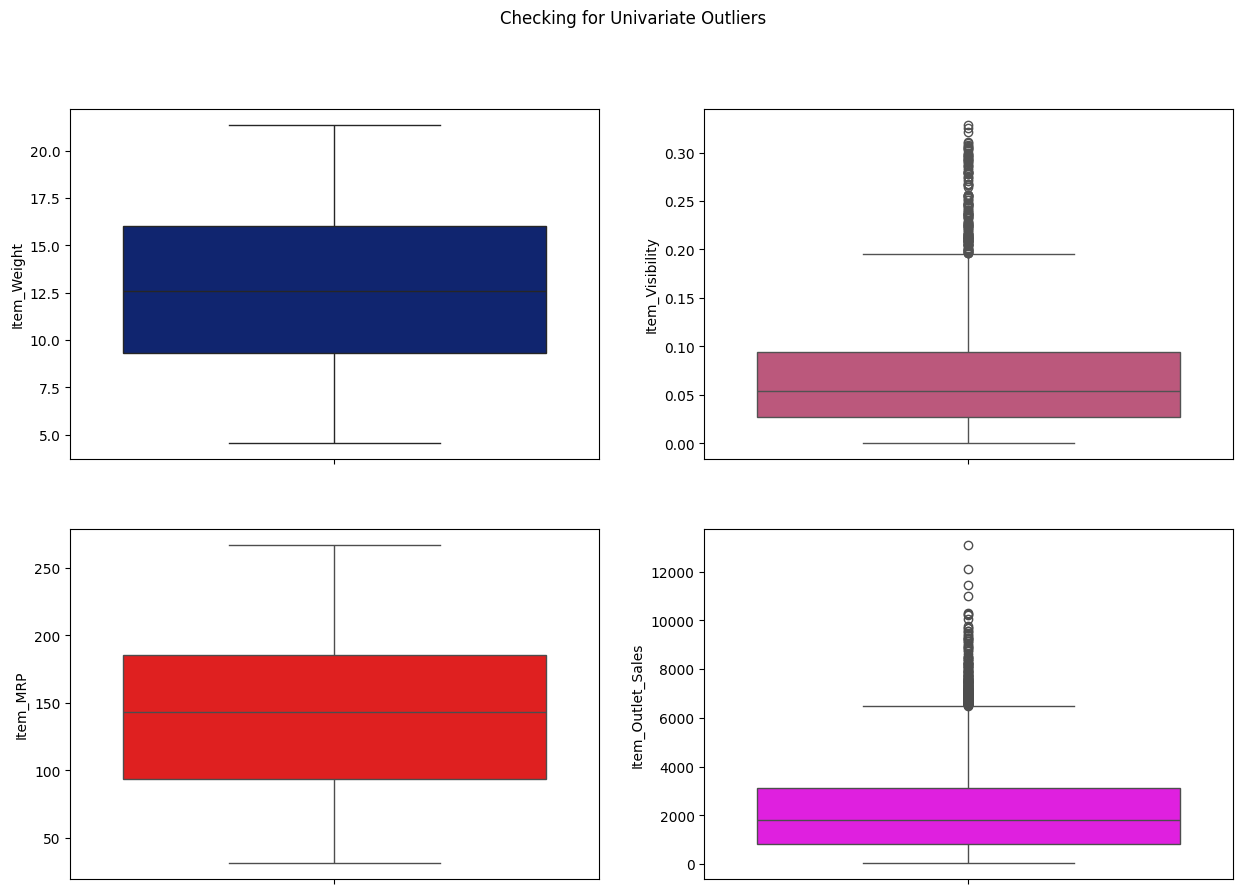

In [219]:
# Checking the outliers in columns

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(data['Item_Weight'], palette='dark')

plt.subplot(2,2,2)
sns.boxplot(data['Item_Visibility'], palette='plasma')

plt.subplot(2,2,3)
sns.boxplot(data['Item_MRP'], color ='red')

plt.subplot(2,2,4)
sns.boxplot(data['Item_Outlet_Sales'], color='magenta')

plt.suptitle("Checking for Univariate Outliers")
plt.show()

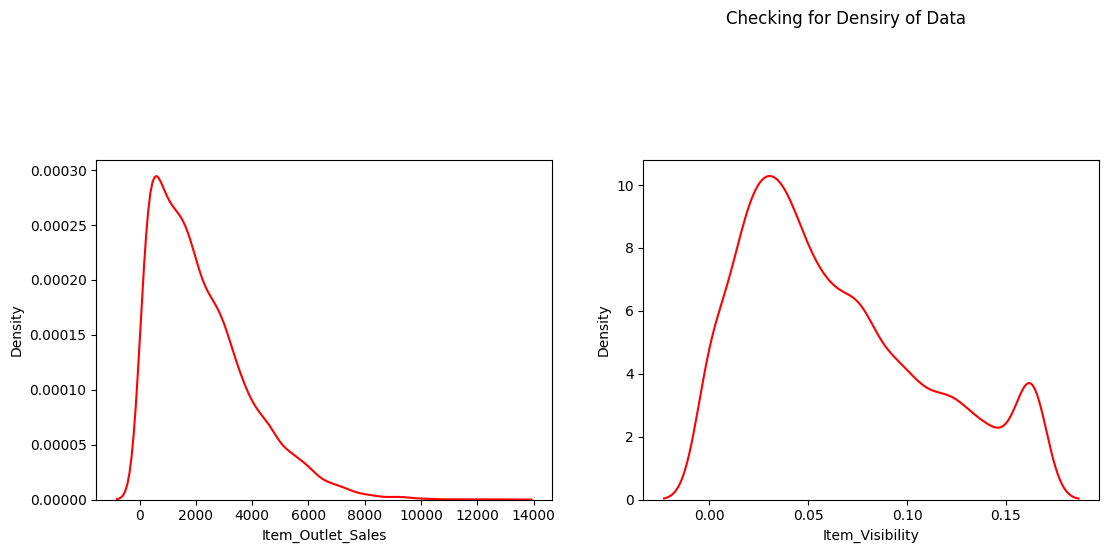

In [278]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.kdeplot(data['Item_Outlet_Sales'], color= 'red')

plt.subplot(3,3,2)
sns.kdeplot(data['Item_Visibility'], color = 'red')

plt.suptitle("Checking for Densiry of Data")
plt.show()

#Winsorizing

Limiting extreme values in a dataset to a specified percentile range to reduce the impact of outliers

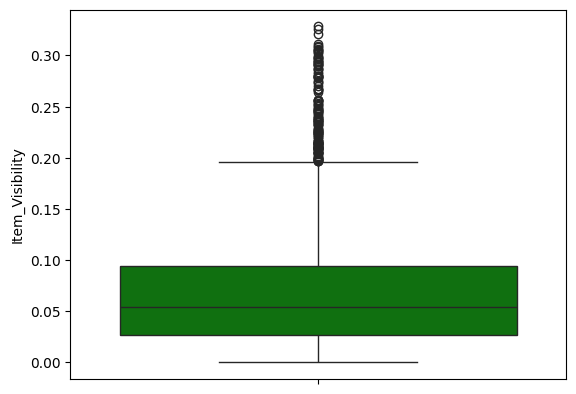

In [221]:
sns.boxplot(data['Item_Visibility'], color = 'green')
plt.show()

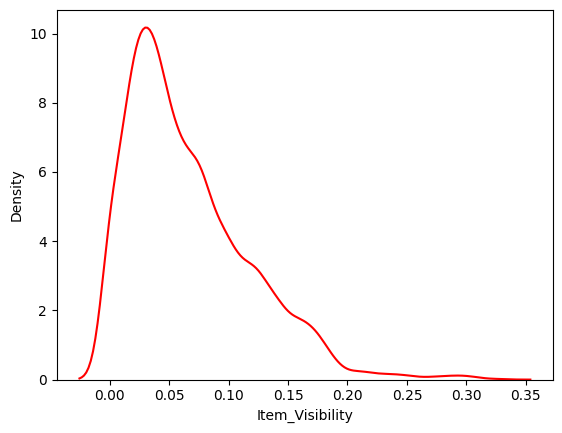

In [222]:
sns.kdeplot(data['Item_Visibility'], color = 'red')
plt.show()

In [223]:
# Winsorize the variable

winsorized_data = winsorize(data['Item_Visibility'], limits=[0.05, 0.05])
winsorized_data

masked_array(data=[0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627,
                   0.14522065, 0.04487828],
             mask=False,
       fill_value=1e+20)

In [224]:
# Update the Winsorized variable in the dataset

data['Item_Visibility'] = winsorized_data

#**IQR (Inter Quartile Range)**

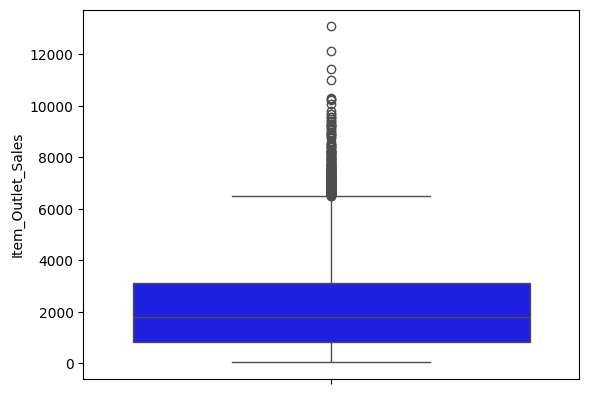

In [225]:
sns.boxplot(data['Item_Outlet_Sales'], color = 'blue')
plt.show()

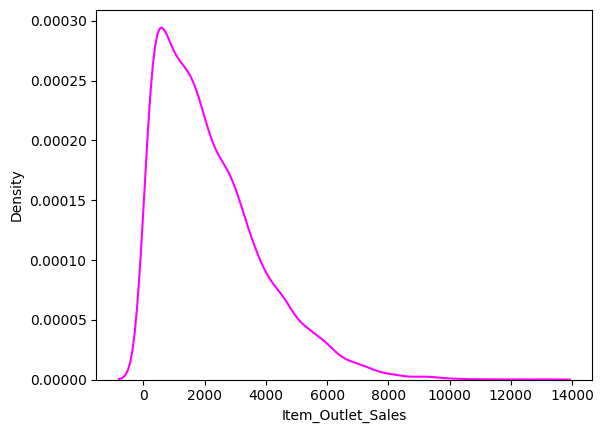

In [226]:
sns.kdeplot(data['Item_Outlet_Sales'], color = 'magenta')
plt.show()

In [227]:
q1 = data['Item_Outlet_Sales'].quantile(0.25)
q3 = data['Item_Outlet_Sales'].quantile(0.75)

In [228]:
iqr = q3 - q1
print(iqr)

2267.049


In [229]:
#formula for LOWER LIMIT & UPPER LIMIT

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

print('Lower Limit{} \nand \nUpper Limit {}'.format(lower_limit, upper_limit))

Lower Limit-2566.3261 
and 
Upper Limit 6501.8699


In [230]:
# Creating a new column for outliers indicator

data['outlier_flag'] = np.where((data['Item_Outlet_Sales'] < lower_limit )  | (data['Item_Outlet_Sales'] > upper_limit), 'outlier', 'not_outlier')

In [231]:
data[['Item_Outlet_Sales', 'outlier_flag']]

,Item_Outlet_Sales,outlier_flag
0,3735.1380,not_outlier
1,443.4228,not_outlier
2,2097.2700,not_outlier
3,732.3800,not_outlier
4,994.7052,not_outlier
...,...,...
8518,2778.3834,not_outlier
8519,549.2850,not_outlier
8520,1193.1136,not_outlier
8521,1845.5976,not_outlier


In [232]:
data['outlier_flag'].value_counts()

,count
outlier_flag,
not_outlier,8337
outlier,186


In [233]:
# Removing outliers

data[~(data['outlier_flag'] == 'outlier')]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,outlier_flag
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,not_outlier
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,not_outlier
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,not_outlier
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,not_outlier
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,not_outlier
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834,not_outlier
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,not_outlier
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,not_outlier
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,not_outlier


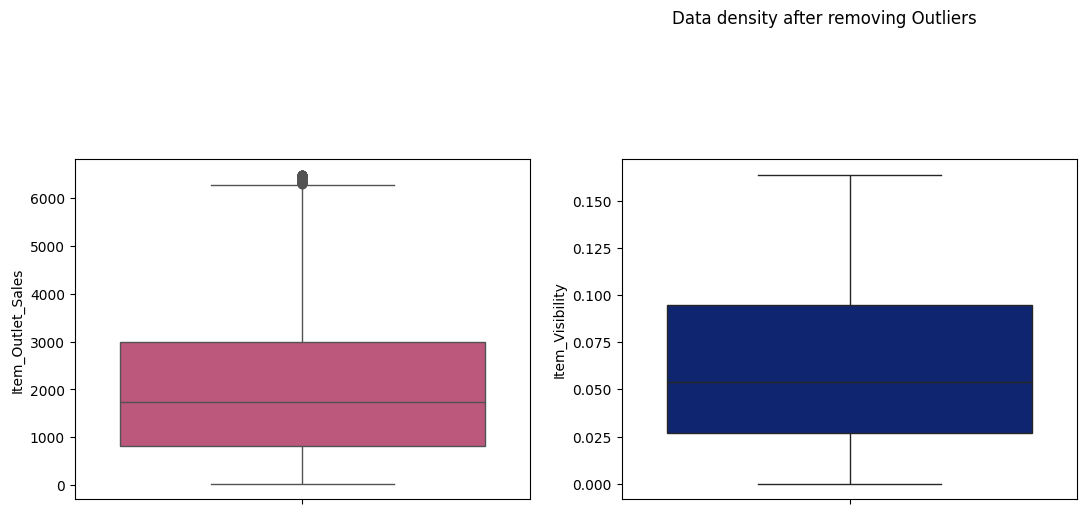

In [234]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.boxplot(data[(data['outlier_flag'] == 'not_outlier')]['Item_Outlet_Sales'], palette='plasma')

plt.subplot(3,3,2)
sns.boxplot(data['Item_Visibility'], palette='dark')

plt.suptitle("Data density after removing Outliers")
plt.show()

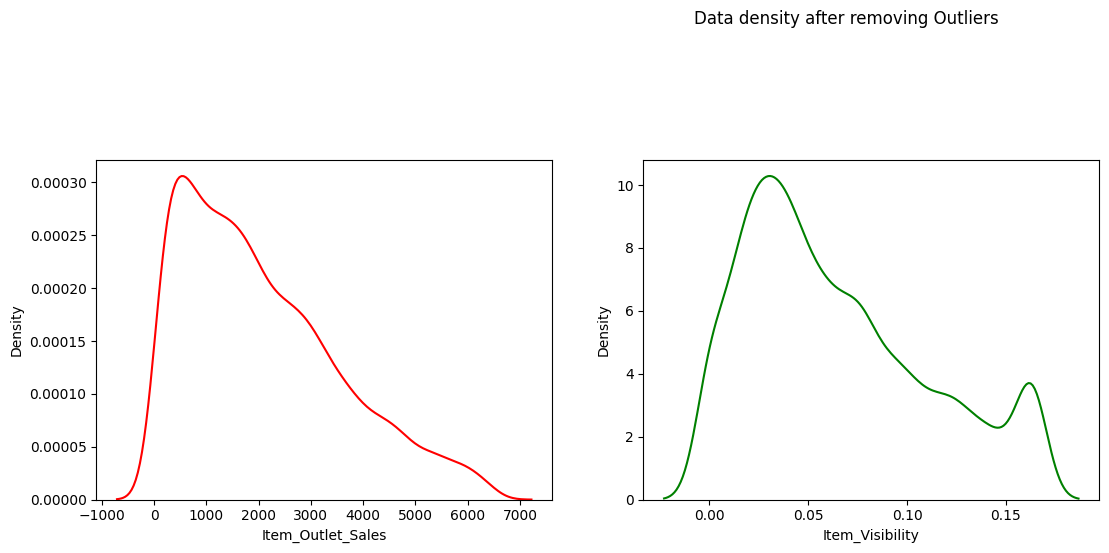

In [235]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.kdeplot(data[(data['outlier_flag'] == 'not_outlier')]['Item_Outlet_Sales'], color = 'red')

plt.subplot(3,3,2)
sns.kdeplot(data['Item_Visibility'], color = 'green')

plt.suptitle("Data density after removing Outliers")
plt.show()

In [236]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,outlier_flag
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,not_outlier
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,not_outlier
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,not_outlier
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,not_outlier
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,not_outlier


In [237]:
# Dropping 'otlier_flag' column

data.drop('outlier_flag', axis=1, inplace=True)

In [238]:
print("After removing the outliers, now the data has \n{} rows \nand \n{} columns".format(data.shape[0],data.shape[1]))

After removing the outliers, now the data has 
8523 rows 
and 
9 columns


#**Data Encoding**

In [239]:
data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [240]:
data.select_dtypes(include='object')

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1
...,...,...,...,...,...
8518,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,Medium,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2


#**One_Hot_Encoder**

In [241]:
nominal_col = ['Item_Type', 'Outlet_Type']

In [242]:
data['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


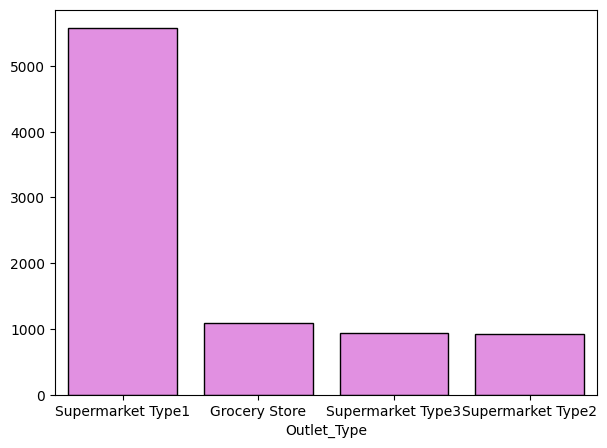

In [279]:
plt.figure(figsize=(7,5))
sns.barplot(x=data['Outlet_Type'].value_counts().index, y=data['Outlet_Type'].value_counts().values, color = 'violet', edgecolor='k')
plt.show()

In [244]:
data['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


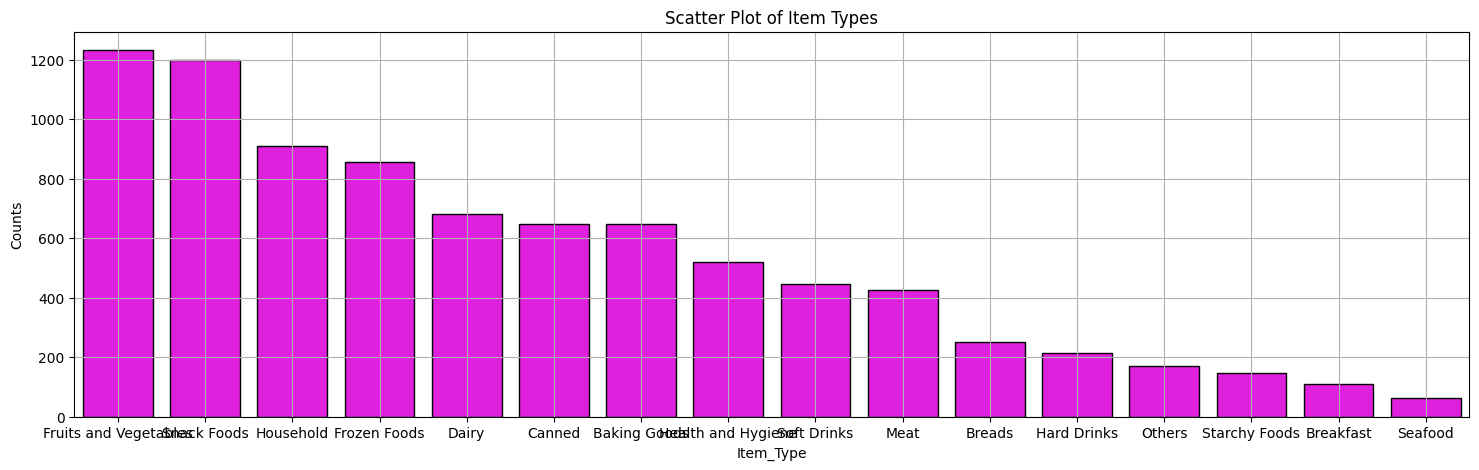

In [280]:
plt.figure(figsize=(18,5))
sns.barplot(x=data['Item_Type'].value_counts().index, y=data['Item_Type'].value_counts().values, color = 'magenta', edgecolor='k')
plt.xlabel('Item_Type')
plt.ylabel('Counts')
plt.title('Scatter Plot of Item Types')
plt.grid(True)
plt.show()

In [246]:
# OneHotEncoder for nominal categories

one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


In [247]:
ohe_df = pd.DataFrame(one_hot_encoder.fit_transform(data[nominal_col]), columns=one_hot_encoder.get_feature_names_out())

In [295]:
# correlation_matrix: Crorrelation of data of all the columns in ohe hot encoded dataset

correlation_matrix_1 = oe_df.corr()

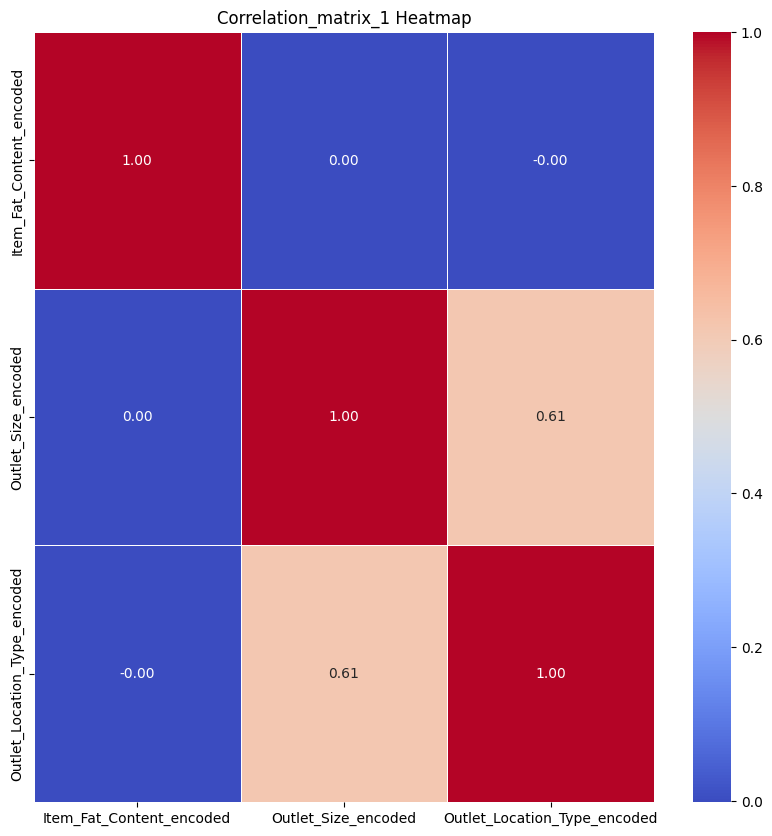

In [296]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation_matrix_1 Heatmap')
plt.show()

In [248]:
# Concating original dataset with one hot encoded dataset

data_1 = pd.concat([data, ohe_df], axis=1)

In [249]:
data_1.drop(columns=nominal_col, inplace=True)

In [250]:
data_1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,3735.1380,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,443.4228,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,2097.2700,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,Regular,0.000000,182.0950,Medium,Tier 3,732.3800,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.93,Low Fat,0.000000,53.8614,High,Tier 3,994.7052,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#**Ordinal_Encoder**

In [251]:
# OrdinalEncoder for ordinal categories

ordinal_col = ['Item_Fat_Content',  'Outlet_Size', 'Outlet_Location_Type']

In [252]:
data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [253]:
# Keeping all the values in same format

replacing_values = {'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}

In [254]:
data['Item_Fat_Content'].replace(replacing_values, inplace = True)

In [255]:
data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


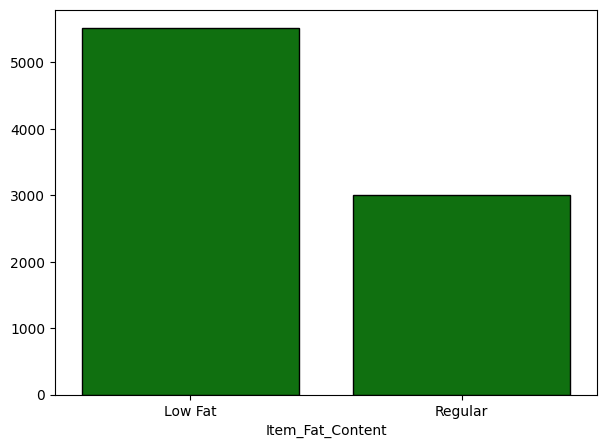

In [281]:
plt.figure(figsize=(7,5))
sns.barplot(x=data['Item_Fat_Content'].value_counts().index, y=data['Item_Fat_Content'].value_counts().values, color = 'green', edgecolor='k')
plt.show()

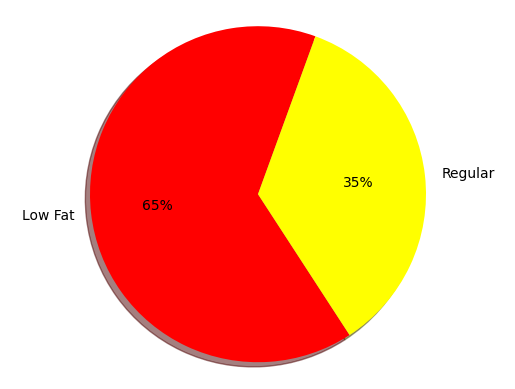

In [283]:
labels = ['Low Fat', 'Regular']
sizes = [5517, 3006]
colors = ['red','yellow']
explode = (0, 0)

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct= '%1.0f%%', shadow=True, startangle= 70)
plt.axis('equal')

plt.show()

In [258]:
data['Outlet_Size'].value_counts(dropna = False)

,count
Outlet_Size,
Medium,5203
Small,2388
High,932


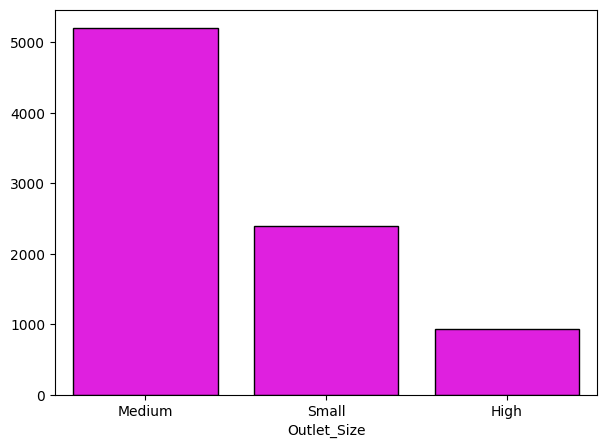

In [284]:
plt.figure(figsize=(7,5))
sns.barplot(x=data['Outlet_Size'].value_counts().index, y=data['Outlet_Size'].value_counts().values, color = 'magenta', edgecolor='k')
plt.show()

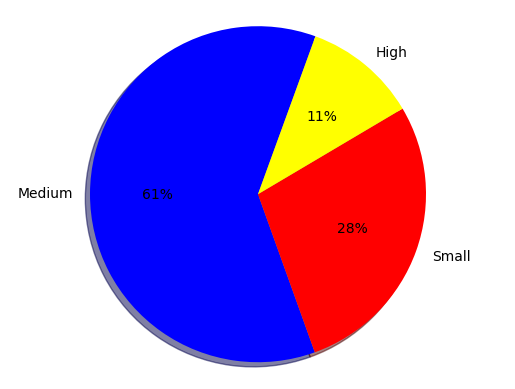

In [260]:
labels = ['Medium', 'Small','High']
sizes = [5203, 2388, 932]
colors = ['blue','red', 'yellow']
explode = (0,0,0)

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct= '%1.0f%%', shadow=True, startangle= 70)
plt.axis('equal')

plt.show()

In [261]:
data['Outlet_Location_Type'].value_counts(dropna = False)

,count
Outlet_Location_Type,
Tier 3,3350
Tier 2,2785
Tier 1,2388


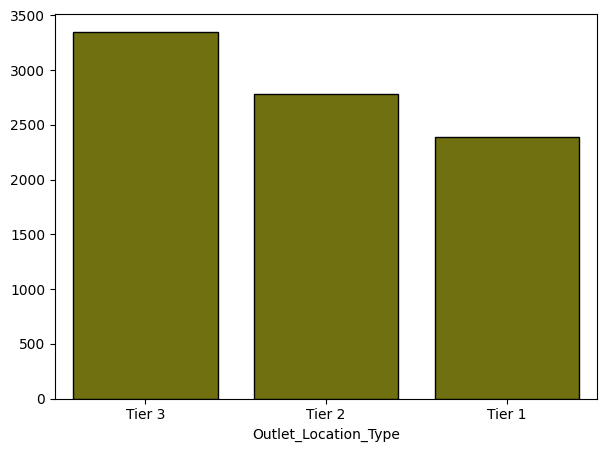

In [285]:
plt.figure(figsize=(7,5))
sns.barplot(x=data['Outlet_Location_Type'].value_counts().index, y=data['Outlet_Location_Type'].value_counts().values, color = 'olive', edgecolor='k')
plt.show()

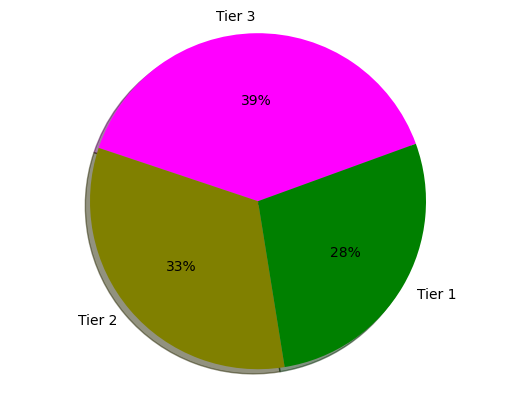

In [263]:
labels = ['Tier 3', 'Tier 2','Tier 1']
sizes = [3350, 2785, 2388]
colors = ['magenta','olive', 'green']
explode = (0,0,0)

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct= '%1.0f%%', shadow=True, startangle= 20)
plt.axis('equal')

plt.show()

In [264]:
# Creating categories order wise as per the choice before ordinal encoding

categories=[
    ['Low Fat', 'Regular'],
    ['Small', 'Medium', 'High'],
    ['Tier 1', 'Tier 2', 'Tier 3']
    ]

In [265]:
ordinal_encoder = OrdinalEncoder(categories = categories)

In [266]:
oe_df = pd.DataFrame(ordinal_encoder.fit_transform(data[ordinal_col]), columns=[col+'_encoded' for col in data[ordinal_col].columns])

In [291]:
# correlation_matrix: Crorrelation of data of all the columns in ordinal encoded dataset

correlation_matrix = oe_df.corr()

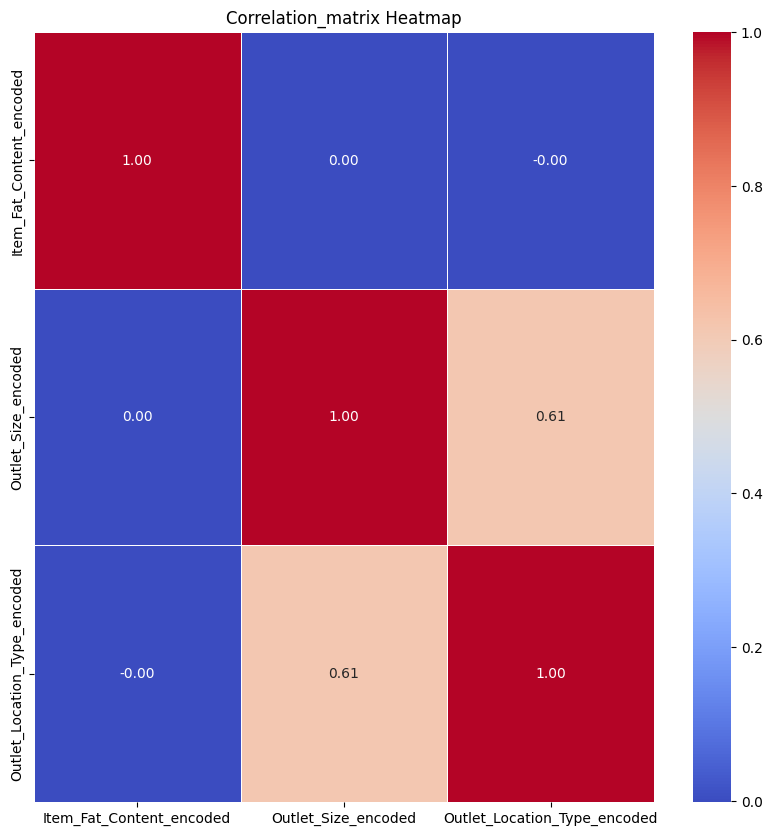

In [297]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation_matrix Heatmap')
plt.show()

In [267]:
# Concating all the encoded datasets to form final dataset

final_df = pd.concat([data_1, oe_df], axis=1)

In [268]:
final_df.drop(columns = ordinal_col, inplace=True)

In [269]:
 # Final dataset

 final_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_encoded,Outlet_Size_encoded,Outlet_Location_Type_encoded
0,9.30,0.016047,249.8092,3735.1380,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5.92,0.019278,48.2692,443.4228,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0
2,17.50,0.016760,141.6180,2097.2700,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,19.20,0.000000,182.0950,732.3800,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
4,8.93,0.000000,53.8614,994.7052,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0


In [270]:
# Types of columns in final dataset

final_df.dtypes

,0
Item_Weight,float64
Item_Visibility,float64
Item_MRP,float64
Item_Outlet_Sales,float64
Item_Type_Baking Goods,float64
Item_Type_Breads,float64
Item_Type_Breakfast,float64
Item_Type_Canned,float64
Item_Type_Dairy,float64
Item_Type_Frozen Foods,float64


In [271]:
# Information of final dataset

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Item_Outlet_Sales                8523 non-null   float64
 4   Item_Type_Baking Goods           8523 non-null   float64
 5   Item_Type_Breads                 8523 non-null   float64
 6   Item_Type_Breakfast              8523 non-null   float64
 7   Item_Type_Canned                 8523 non-null   float64
 8   Item_Type_Dairy                  8523 non-null   float64
 9   Item_Type_Frozen Foods           8523 non-null   float64
 10  Item_Type_Fruits and Vegetables  8523 non-null   float64
 11  Item_Type_Hard Drinks            8523 non-null   float64
 12  Item_Type_Health and

#**Scaling Dataset**

#**MinMax Scaler**
The **MinMax Scaler** transforms features by scaling them to a fixed range, usually [0, 1], based on the minimum and maximum values of the feature.

In [272]:
# MinMax Scaler

minmax = MinMaxScaler()

In [273]:
minmaxed_scaled_df = pd.DataFrame(minmax.fit_transform(final_df), columns = minmax.feature_names_in_)

In [274]:
minmaxed_scaled_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_encoded,Outlet_Size_encoded,Outlet_Location_Type_encoded
0,0.282525,0.097966,0.927507,0.283587,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0
1,0.081274,0.117690,0.072068,0.031419,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5,1.0
2,0.770765,0.102317,0.468288,0.158115,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0
3,0.871986,0.000000,0.640093,0.053555,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.5,1.0
4,0.260494,0.000000,0.095805,0.073651,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


#**Standard Scaler**
The **Standard Scaler** standardizes features by removing the mean and scaling them to unit variance, transforming the data to a range of -1 to 1.

In [275]:
# Standard Scaler

std_scale = StandardScaler()

In [276]:
std_scaled_df = pd.DataFrame(std_scale.fit_transform(final_df), columns = std_scale.feature_names_in_)

In [277]:
std_scaled_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_encoded,Outlet_Size_encoded,Outlet_Location_Type_encoded
0,-0.831187,-1.036505,1.747454,0.910601,-0.286855,-0.174193,-0.114346,-0.287094,3.390733,-0.334137,...,-0.404805,-0.234708,-0.132935,-0.381529,0.726802,-0.349551,-0.351028,-0.738147,0.284581,-1.369334
1,-1.630810,-0.967181,-1.489023,-1.018440,-0.286855,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,...,-0.404805,4.260611,-0.132935,-0.381529,-1.375891,2.860816,-0.351028,1.354743,0.284581,1.091569
2,1.108727,-1.021212,0.010040,-0.049238,-0.286855,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,...,-0.404805,-0.234708,-0.132935,-0.381529,0.726802,-0.349551,-0.351028,-0.738147,0.284581,-1.369334
3,1.510904,-1.380825,0.660050,-0.849103,-0.286855,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,...,-0.404805,-0.234708,-0.132935,2.621031,-1.375891,-0.349551,-0.351028,1.354743,0.284581,1.091569
4,-0.918719,-1.380825,-1.399220,-0.695373,-0.286855,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,...,-0.404805,-0.234708,-0.132935,-0.381529,0.726802,-0.349551,-0.351028,-0.738147,1.950437,1.091569
